In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import pandas as pd
import os
import seaborn as sns
import glob
from copy import deepcopy

In [3]:
from utils.pipeline import run_matches_discovery, discovery_pipeline, gen_expname
from utils.pipeline_wrappers import gen_expname, run_until_coverage_th, try_run_exp, cv_experiment, monitor_callback, grid_exp
from utils.feature_utils import op_100, get_feats, get_seq_names, get_dh_feats_wrap, load_feats
from utils.helper_fncs import load_json
from utils.skopt_tune import TunerSkopt

In [18]:
dfnames = ['knn_op100_l6_lmax_dim_fix_r_s',
 'zr_cat_c3_right_PCA40_T_dx_castthr',
 'zr_cat_op100_T_medthr_dx_castthr',
# 'knn_c3_right_PCA40_l6-45_dim_fix_r_s'
# 'knn_c3_right_PCA40_l6_top_delta_r_s_cov20'
 'knn_c3_right_PCA40_l6_lmax_top_delta_cov15'
          ]

keys_knn = ['a', 'dim_fix', 'k', 'lmax', 'lmin', 'top_delta', 'r','s']
keys_zr = ['B',  'D' ,  'P' ,  'R' ,  'T',  'Tscore',  'castthr',  'dx',  'dy',
           'medthr',  'rhothr',  'trimthr',  'n_concat']

EXPS = {'E-SDTW (DH)': dfnames[1],
        'KNN (DH)': dfnames[3], 
        'KNN (OP)': dfnames[0]}

KEYS = {'E-SDTW (DH)': keys_zr,
        'KNN (DH)': keys_knn, 
        'KNN (OP)': keys_knn}


EXPS

{'E-SDTW (DH)': 'zr_cat_c3_right_PCA40_T_dx_castthr',
 'KNN (DH)': 'knn_c3_right_PCA40_l6_lmax_top_delta_cov15',
 'KNN (OP)': 'knn_op100_l6_lmax_dim_fix_r_s'}

In [19]:
all_dfs = {}
for key,dfname in EXPS.items():
    all_dfs[key] = pd.read_csv('../results/cv/{}.csv'.format(dfname))
    print(key, len(all_dfs[key]))

E-SDTW (DH) 36
KNN (DH) 36
KNN (OP) 36


In [20]:
cvsets = set(['A','B','C'])
signers_per_set = {'A': [4,8,9], 'B':[2,5,7], 'C':[1,3,6]}



In [21]:
all_params = {}
alg_type = 'zr_cat'
all_params['E-SDTW (DH)'] = load_json(full_path='/home/korhan/Dropbox/config/{}.json'.format(alg_type))

alg_type = 'knn'
all_params['KNN (DH)'] = load_json(full_path='/home/korhan/Dropbox/config/{}.json'.format(alg_type))
all_params['KNN (OP)'] = load_json(full_path='/home/korhan/Dropbox/config/{}.json'.format(alg_type))


In [8]:
dfname

'knn_op100_l6_lmax_dim_fix_r_s'

In [22]:
cv_stats = []
for i in [0,16,32]:
    all_stats = dict()

    for key,dfname in EXPS.items():

        df = all_dfs[key]
        params = all_params[key]
        all_stats[key] = []

    #    for k in KEYS[key]:
    #        params['disc'][k] = df[k][i]

    #    params['CVset'] = df.set[i]
    #    params['featype'] = ''

#        params['']
        params['expname'] = df.exp_path[i].split('/')[-2]
        print(params['expname'])

        """        params['clustering'] = {
                               'method': 'modularity',
                               'cost_thr': 0.1,
                               'peak_thr': 0.35,
                               'modularity_thr': 0,
                               'clus_alg': 'fastgreedy',
                               'min_cluster_size':2,
                               'dedupthr': 0.5,
                               }
        """        

        for params['covth'] in [2,4,6,8,10,12,15,20,25]:
            print(params['covth'])
        #         scores = try_run_exp(feats_dict, params)
    #        try:
            matches_df, nodes_df, clusters_list, scores, pars = run_until_coverage_th(
                {}, params, covth=params['covth'])
            if scores['ned'] < 100:
                all_stats[key].append(scores)
        #except: 
        #             print('passed')
         #       pass

        params['clustering']['cost_thr'] = 0.01    
        
        
    cv_stats.append(all_stats)

zr_cat_A_c3_right_PCA40_B300_D15_P4_R15_T0.3663_Tscore0.5_castthr7.0599_dx29_dy5_medthr0.45_rhothr0.0_trimthr1.0_n_concat20
2
0.001
*** Matches already discovered !!! ***
*** found 14016 matches ***
*** post disc completed, found 28 segments from 14 clusters ***
*** Coverage: 0.7100, NED: 24.35
trial 0 th:0.00100 cov:0.71000 err:-1.29000
0.0026760563380281693
*** Matches already discovered !!! ***
*** found 14016 matches ***
*** post disc completed, found 76 segments from 38 clusters ***
*** Coverage: 1.4600, NED: 27.93
trial 1 th:0.00268 cov:1.46000 err:-0.54000
4
0.0026760563380281693
*** Matches already discovered !!! ***
*** found 14016 matches ***
*** post disc completed, found 76 segments from 38 clusters ***
*** Coverage: 1.4600, NED: 27.93
trial 0 th:0.00268 cov:1.46000 err:-2.54000
0.006965078140073317
*** Matches already discovered !!! ***
*** found 14016 matches ***
*** post disc completed, found 196 segments from 98 clusters ***
*** Coverage: 2.4500, NED: 28.69
trial 1 th:0

*** Coverage: 7.7400, NED: 47.24
trial 0 th:0.52614 cov:7.74000 err:-2.26000
0.6457787381138086
*** Matches already discovered !!! ***
*** found 28736 matches ***
*** pairwise clustering ***
*** post disc completed, found 14818 segments from 7409 clusters ***
*** Coverage: 9.4000, NED: 48.92
trial 1 th:0.64578 cov:9.40000 err:-0.60000
12
0.6457787381138086
*** Matches already discovered !!! ***
*** found 28736 matches ***
*** post disc completed, found 14818 segments from 7409 clusters ***
*** Coverage: 9.4000, NED: 48.92
trial 0 th:0.64578 cov:9.40000 err:-2.60000
0.7831784696273848
*** Matches already discovered !!! ***
*** found 28736 matches ***
*** pairwise clustering ***
*** post disc completed, found 18970 segments from 9485 clusters ***
*** Coverage: 12.1400, NED: 48.61
trial 1 th:0.78318 cov:12.14000 err:0.14000
15
0.7831784696273848
*** Matches already discovered !!! ***
*** found 28736 matches ***
*** post disc completed, found 18970 segments from 9485 clusters ***
*** Cover

*** Coverage: 2.2600, NED: 37.57
trial 0 th:0.00597 cov:2.26000 err:-1.74000
0.010046195803417377
*** Matches already discovered !!! ***
*** found 15588 matches ***
*** post disc completed, found 298 segments from 149 clusters ***
*** Coverage: 3.1800, NED: 38.76
trial 1 th:0.01005 cov:3.18000 err:-0.82000
6
0.010046195803417377
*** Matches already discovered !!! ***
*** found 15588 matches ***
*** post disc completed, found 298 segments from 149 clusters ***
*** Coverage: 3.1800, NED: 38.76
trial 0 th:0.01005 cov:3.18000 err:-2.82000
0.01800733210046511
*** Matches already discovered !!! ***
*** found 15588 matches ***
*** post disc completed, found 536 segments from 268 clusters ***
*** Coverage: 4.4400, NED: 41.92
trial 1 th:0.01801 cov:4.44000 err:-1.56000
0.026973087977854575
*** Matches already discovered !!! ***
*** found 15588 matches ***
*** post disc completed, found 786 segments from 393 clusters ***
*** Coverage: 5.7200, NED: 45.00
trial 2 th:0.02697 cov:5.72000 err:-0.2800

*** Coverage: 10.8500, NED: 60.42
trial 1 th:0.28980 cov:10.85000 err:-1.15000
0.32325732837543586
*** Matches already discovered !!! ***
*** found 139840 matches ***
*** post disc completed, found 31714 segments from 15857 clusters ***
*** Coverage: 11.9900, NED: 61.21
trial 2 th:0.32326 cov:11.99000 err:-0.01000
15
0.32325732837543586
*** Matches already discovered !!! ***
*** found 139840 matches ***
*** post disc completed, found 31714 segments from 15857 clusters ***
*** Coverage: 11.9900, NED: 61.21
trial 0 th:0.32326 cov:11.99000 err:-3.01000
0.3841882343077532
*** Matches already discovered !!! ***
*** found 139840 matches ***
*** post disc completed, found 38686 segments from 19343 clusters ***
*** Coverage: 13.9000, NED: 61.76
trial 1 th:0.38419 cov:13.90000 err:-1.10000
0.41447823178562504
*** Matches already discovered !!! ***
*** found 139840 matches ***
*** post disc completed, found 42254 segments from 21127 clusters ***
*** Coverage: 14.9000, NED: 61.87
trial 2 th:0.414

*** Coverage: 5.2000, NED: 19.34
trial 1 th:0.07329 cov:5.20000 err:-0.80000
8
0.07329119009762186
*** Matches already discovered !!! ***
*** found 8580 matches ***
*** post disc completed, found 1234 segments from 617 clusters ***
*** Coverage: 5.2000, NED: 19.34
trial 0 th:0.07329 cov:5.20000 err:-2.80000
0.10711789321960118
*** Matches already discovered !!! ***
*** found 8580 matches ***
*** post disc completed, found 1802 segments from 901 clusters ***
*** Coverage: 7.3600, NED: 24.94
trial 1 th:0.10712 cov:7.36000 err:-0.64000
10
0.10711789321960118
*** Matches already discovered !!! ***
*** found 8580 matches ***
*** post disc completed, found 1802 segments from 901 clusters ***
*** Coverage: 7.3600, NED: 24.94
trial 0 th:0.10712 cov:7.36000 err:-2.64000
0.13826358499812652
*** Matches already discovered !!! ***
*** found 8580 matches ***
*** post disc completed, found 2320 segments from 1160 clusters ***
*** Coverage: 9.2000, NED: 28.25
trial 1 th:0.13826 cov:9.20000 err:-0.800

*** Coverage: 0.4200, NED: 56.25
trial 0 th:0.01000 cov:0.42000 err:-1.58000
0.04523809523809524
*** Matches already discovered !!! ***
*** found 64781 matches ***
*** post disc completed, found 3904 segments from 1952 clusters ***
*** Coverage: 2.6600, NED: 37.77
trial 1 th:0.04524 cov:2.66000 err:0.66000
4
0.04523809523809524
*** Matches already discovered !!! ***
*** found 64781 matches ***
*** post disc completed, found 3904 segments from 1952 clusters ***
*** Coverage: 2.6600, NED: 37.77
trial 0 th:0.04524 cov:2.66000 err:-1.34000
0.06462585034013604
*** Matches already discovered !!! ***
*** found 64781 matches ***
*** post disc completed, found 5288 segments from 2644 clusters ***
*** Coverage: 3.7000, NED: 41.79
trial 1 th:0.06463 cov:3.70000 err:-0.30000
6
0.06462585034013604
*** Matches already discovered !!! ***
*** found 64781 matches ***
*** post disc completed, found 5288 segments from 2644 clusters ***
*** Coverage: 3.7000, NED: 41.79
trial 0 th:0.06463 cov:3.70000 err:-

In [23]:
params_fuse = {'exp_root' : '/home/korhan/Desktop/tez/fuse_exps/',
               'expname':'deneme',
               'disc_method': 'fuse',
               'disc': 
                       {'shift': 0,
                       'scale_param': 1},
              'clustering': {'cost_thr': 0.01, 'method': 'pairwise', 'olapthr_m': 0.4},
             'config_file': '/home/korhan/Dropbox/config/config_phoenix.json',
             'covth': 10,
               'njobs':2,
             'dataset': 'phoenix'} 

params_fuse['zr'] = load_json(full_path='/home/korhan/Dropbox/config/{}.json'.format('zr_cat'))
params_fuse['knn'] = load_json(full_path='/home/korhan/Dropbox/config/{}.json'.format('knn'))

featype = 'c3_right_PCA40_6'
params_fuse['featype'] = featype
params_fuse['CVset'] = 'A'
params_fuse['disc']['scale_param'] = 0.8

key_knn = 'KNN (DH)'
key_zr = 'E-SDTW (DH)'


In [99]:
path_knn

'knn_C_c3_right_PCA40_a3_dim_fix6_emb_typegauss_kernel_k150_lmax18_lmin2_metricL2_normFalse_olapthr_m0.5_pca_seg_typeuniform_top_delta0.05_use_gpuTrue_r0.07_s0.6'

In [103]:
r'FUSION $(\gamma={:.1f}, sl={:.1f})$'.format(scale_r,a)

'FUSION $(\\gamma=1.2, sl=0.6)$'

In [24]:
scale_r = 0.8
params_fuse['disc']['scale_param'] = scale_r

for i in [0,1,2]:
    all_stats = cv_stats[i]
    
    path_knn = all_dfs[key_knn].exp_path[i*16].split('/')[-2]
    path_zr = all_dfs[key_zr].exp_path[i*16].split('/')[-2]

    matches_knn = pd.read_pickle(join(all_params[key_knn]['exp_root'], path_knn, 'matches.pkl'))
    matches_zr = pd.read_pickle(join(all_params[key_zr]['exp_root'], path_zr, 'matches.pkl'))

    params_fuse['zr']['expname'] = path_zr
    params_fuse['knn']['expname'] = path_knn
    
    for a in [0.6, 0.7, 0.8]:
        for scale_r in [0.6,0.8,1]: 

            key = r'FUSION $(\gamma={:.1f}, slp={:.1f})$'.format(scale_r,a)

    #        params_fuse['disc']['scale_param'] = scale_r
            params_fuse['disc']['a'] = a

            all_stats[key] = []

            for params_fuse['covth'] in [2,4,6,8,10,12,15,20,25]:
                print(params_fuse['covth'])
            #         scores = try_run_exp(feats_dict, params)
        #        try:
                scores = try_run_exp({}, params_fuse, genname=True)

                if scores['ned'] < 100:
                    all_stats[key].append(scores)
            #except: 
            #             print('passed')
             #       pass

            params['clustering']['cost_thr'] = 0.01    

        
    cv_stats[i] = all_stats

2
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.6
0.01
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 37618 matches ***
*** pairwise clustering ***
*** post disc completed, found 654 segments from 327 clusters ***
*** Coverage: 3.3300, NED: 29.49
trial 0 th:0.01000 cov:3.33000 err:1.33000
0.005705705705705706
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 37618 matches ***
*** pairwise clustering ***
*** post disc completed, found 384 segments from 192 clusters ***
*** Coverage: 2.5900, NED: 27.84
trial 1 th:0.00571 cov:2.59000 err:0.59000
4
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.6
0.01
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Re

*** post disc completed, found 6090 segments from 3045 clusters ***
*** Coverage: 14.3600, NED: 44.76
trial 3 th:0.12338 cov:14.36000 err:-0.64000
20
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.6
0.01
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 37618 matches ***
*** post disc completed, found 654 segments from 327 clusters ***
*** Coverage: 3.3300, NED: 29.49
trial 0 th:0.01000 cov:3.33000 err:-16.67000
0.057057057057057055
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 37618 matches ***
*** pairwise clustering ***
*** post disc completed, found 3142 segments from 1571 clusters ***
*** Coverage: 8.7600, NED: 39.27
trial 1 th:0.05706 cov:8.76000 err:-11.24000
0.14724108362506155
*** Mat

*** Coverage: 5.7500, NED: 35.54
trial 1 th:0.02853 cov:5.75000 err:-4.25000
0.05851488471943018
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 37618 matches ***
*** post disc completed, found 3198 segments from 1599 clusters ***
*** Coverage: 8.8000, NED: 39.32
trial 2 th:0.05851 cov:8.80000 err:-1.20000
0.06822358201074669
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 37618 matches ***
*** post disc completed, found 3646 segments from 1823 clusters ***
*** Coverage: 9.6700, NED: 39.91
trial 3 th:0.06822 cov:9.67000 err:-0.33000
12
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.6
0.01
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 mat

*** Coverage: 2.5900, NED: 27.84
trial 1 th:0.00571 cov:2.59000 err:0.59000
4
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.6
0.01
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 37618 matches ***
*** post disc completed, found 654 segments from 327 clusters ***
*** Coverage: 3.3300, NED: 29.49
trial 0 th:0.01000 cov:3.33000 err:-0.67000
6
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.6
0.01
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 37618 matches ***
*** post disc completed, found 654 segments from 327 clusters ***
*** Coverage: 3.3300, NED: 29.49
trial 0 th:0.01000 cov:3.33000 err:-2.67000
0.017117117117117116
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matche

*** Coverage: 8.7600, NED: 39.27
trial 1 th:0.05706 cov:8.76000 err:-11.24000
0.14724108362506155
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 37618 matches ***
*** post disc completed, found 7170 segments from 3585 clusters ***
*** Coverage: 16.2800, NED: 46.88
trial 2 th:0.14724 cov:16.28000 err:-3.72000
0.18511357776093362
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 37618 matches ***
*** post disc completed, found 8856 segments from 4428 clusters ***
*** Coverage: 18.9400, NED: 49.29
trial 3 th:0.18511 cov:18.94000 err:-1.06000
0.19755739726272015
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 m

*** post disc completed, found 3458 segments from 1729 clusters ***
*** Coverage: 9.6500, NED: 38.54
trial 3 th:0.07946 cov:9.65000 err:-0.35000
12
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.7
0.01
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 29262 matches ***
*** post disc completed, found 520 segments from 260 clusters ***
*** Coverage: 2.9900, NED: 28.23
trial 0 th:0.01000 cov:2.99000 err:-9.01000
0.038127090301003336
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 29262 matches ***
*** pairwise clustering ***
*** post disc completed, found 1872 segments from 936 clusters ***
*** Coverage: 6.1400, NED: 35.71
trial 1 th:0.03813 cov:6.14000 err:-5.86000
0.08642978712109144
*** Matches 

*** Coverage: 3.3000, NED: 28.90
trial 1 th:0.01271 cov:3.30000 err:-0.70000
6
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.7
0.01
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 29262 matches ***
*** post disc completed, found 520 segments from 260 clusters ***
*** Coverage: 2.9900, NED: 28.23
trial 0 th:0.01000 cov:2.99000 err:-3.01000
0.019063545150501668
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 29262 matches ***
*** post disc completed, found 1000 segments from 500 clusters ***
*** Coverage: 3.9800, NED: 32.42
trial 1 th:0.01906 cov:3.98000 err:-2.02000
0.036178997331171234
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 match

*** post disc completed, found 8078 segments from 4039 clusters ***
*** Coverage: 19.3000, NED: 48.90
trial 3 th:0.20438 cov:19.30000 err:-0.70000
25
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.7
0.01
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 29262 matches ***
*** post disc completed, found 520 segments from 260 clusters ***
*** Coverage: 2.9900, NED: 28.23
trial 0 th:0.01000 cov:2.99000 err:-22.01000
0.07943143812709029
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 29262 matches ***
*** post disc completed, found 3456 segments from 1728 clusters ***
*** Coverage: 9.6300, NED: 38.51
trial 1 th:0.07943 cov:9.63000 err:-15.37000
0.22864106257807143
*** Matches already discovered !!! *

*** Coverage: 10.2300, NED: 39.44
trial 2 th:0.08643 cov:10.23000 err:-1.77000
0.10387308374780783
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 29262 matches ***
*** post disc completed, found 4364 segments from 2182 clusters ***
*** Coverage: 11.7600, NED: 40.98
trial 3 th:0.10387 cov:11.76000 err:-0.24000
15
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.7
0.01
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 29262 matches ***
*** post disc completed, found 520 segments from 260 clusters ***
*** Coverage: 2.9900, NED: 28.23
trial 0 th:0.01000 cov:2.99000 err:-12.01000
0.04765886287625417
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 

*** Coverage: 2.4700, NED: 28.70
trial 0 th:0.01000 cov:2.47000 err:-5.53000
0.030769230769230767
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 24059 matches ***
*** pairwise clustering ***
*** post disc completed, found 1260 segments from 630 clusters ***
*** Coverage: 4.4400, NED: 33.03
trial 1 th:0.03077 cov:4.44000 err:-3.56000
0.06538637251073798
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 24059 matches ***
*** pairwise clustering ***
*** post disc completed, found 2408 segments from 1204 clusters ***
*** Coverage: 7.0100, NED: 36.07
trial 2 th:0.06539 cov:7.01000 err:-0.99000
10
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.8
0.01
*** Matches already discovered !!! ***
Read 2288 m

*** Coverage: 9.4600, NED: 38.54
trial 1 th:0.09615 cov:9.46000 err:-15.54000
0.2738045559590624
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 24059 matches ***
*** pairwise clustering ***
*** post disc completed, found 8588 segments from 4294 clusters ***
*** Coverage: 20.8900, NED: 50.76
trial 2 th:0.27380 cov:20.89000 err:-4.11000
0.32560768944819496
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 24059 matches ***
*** pairwise clustering ***
*** post disc completed, found 10262 segments from 5131 clusters ***
*** Coverage: 24.1800, NED: 53.77
trial 3 th:0.32561 cov:24.18000 err:-0.82000
2
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.8
0.01
*** Matches already discovered !!! ***
Read 22

*** Coverage: 6.7000, NED: 35.98
trial 1 th:0.05769 cov:6.70000 err:-8.30000
0.1442093107837788
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 24059 matches ***
*** post disc completed, found 4730 segments from 2365 clusters ***
*** Coverage: 12.7200, NED: 42.54
trial 2 th:0.14421 cov:12.72000 err:-2.28000
0.17101233582789732
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 24059 matches ***
*** post disc completed, found 5508 segments from 2754 clusters ***
*** Coverage: 14.1400, NED: 44.30
trial 3 th:0.17101 cov:14.14000 err:-0.86000
20
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.8
0.01
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 

*** Coverage: 5.1500, NED: 34.11
trial 1 th:0.03846 cov:5.15000 err:-4.85000
0.0859700057405281
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 24059 matches ***
*** post disc completed, found 3014 segments from 1507 clusters ***
*** Coverage: 8.5700, NED: 37.45
trial 2 th:0.08597 cov:8.57000 err:-1.43000
0.10246600132351061
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matches
Read 2726 matches
Read 2733 matches
*** Matches already discovered !!! ***
*** found 24059 matches ***
*** post disc completed, found 3506 segments from 1753 clusters ***
*** Coverage: 9.8700, NED: 38.98
trial 3 th:0.10247 cov:9.87000 err:-0.13000
12
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.8
0.01
*** Matches already discovered !!! ***
Read 2288 matches
Read 2667 matches
Read 2474 matches
Read 3001 matc

*** Coverage: 3.3300, NED: 29.49
trial 0 th:0.01000 cov:3.33000 err:-0.67000
6
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.6
0.01
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 125675 matches ***
*** post disc completed, found 654 segments from 327 clusters ***
*** Coverage: 3.3300, NED: 29.49
trial 0 th:0.01000 cov:3.33000 err:-2.67000
0.017117117117117116
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 125675 matches ***
*** post disc completed, found 1118 segments from 559 clusters ***
*** Coverage: 4.2200, NED: 33.51
trial 1 th:0.01712 cov:4.22000 err:-1.78000
0.030283783783783783
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 mat

*** Coverage: 16.2800, NED: 46.88
trial 2 th:0.14724 cov:16.28000 err:-3.72000
0.18511357776093362
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 125675 matches ***
*** post disc completed, found 8856 segments from 4428 clusters ***
*** Coverage: 18.9400, NED: 49.29
trial 3 th:0.18511 cov:18.94000 err:-1.06000
0.19755739726272015
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 125675 matches ***
*** post disc completed, found 9448 segments from 4724 clusters ***
*** Coverage: 19.8600, NED: 50.26
trial 4 th:0.19756 cov:19.86000 err:-0.14000
25
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.6
0.01
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 

*** Coverage: 3.3300, NED: 29.49
trial 0 th:0.01000 cov:3.33000 err:-8.67000
0.03423423423423423
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 125675 matches ***
*** post disc completed, found 2044 segments from 1022 clusters ***
*** Coverage: 6.4300, NED: 36.69
trial 1 th:0.03423 cov:6.43000 err:-5.57000
0.07438879686137749
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 125675 matches ***
*** post disc completed, found 3918 segments from 1959 clusters ***
*** Coverage: 10.2000, NED: 40.16
trial 2 th:0.07439 cov:10.20000 err:-1.80000
0.09059441146010389
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 ma

*** Coverage: 3.3300, NED: 29.49
trial 0 th:0.01000 cov:3.33000 err:-2.67000
0.017117117117117116
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 125675 matches ***
*** post disc completed, found 1118 segments from 559 clusters ***
*** Coverage: 4.2200, NED: 33.51
trial 1 th:0.01712 cov:4.22000 err:-1.78000
0.030283783783783783
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 125675 matches ***
*** post disc completed, found 1834 segments from 917 clusters ***
*** Coverage: 5.8700, NED: 35.89
trial 2 th:0.03028 cov:5.87000 err:-0.13000
8
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.6
0.01
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 ma

*** Coverage: 19.8600, NED: 50.26
trial 4 th:0.19756 cov:19.86000 err:-0.14000
25
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.6
0.01
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 125675 matches ***
*** post disc completed, found 654 segments from 327 clusters ***
*** Coverage: 3.3300, NED: 29.49
trial 0 th:0.01000 cov:3.33000 err:-21.67000
0.07132132132132131
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 125675 matches ***
*** post disc completed, found 3780 segments from 1890 clusters ***
*** Coverage: 9.9500, NED: 40.05
trial 1 th:0.07132 cov:9.95000 err:-15.05000
0.20069356214220263
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977

*** Coverage: 10.2300, NED: 39.44
trial 2 th:0.08643 cov:10.23000 err:-1.77000
0.10387308374780783
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 92635 matches ***
*** post disc completed, found 4364 segments from 2182 clusters ***
*** Coverage: 11.7600, NED: 40.98
trial 3 th:0.10387 cov:11.76000 err:-0.24000
15
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.7
0.01
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 92635 matches ***
*** post disc completed, found 520 segments from 260 clusters ***
*** Coverage: 2.9900, NED: 28.23
trial 0 th:0.01000 cov:2.99000 err:-12.01000
0.04765886287625417
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 

*** Coverage: 2.9900, NED: 28.23
trial 0 th:0.01000 cov:2.99000 err:-5.01000
0.025418060200668894
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 92635 matches ***
*** post disc completed, found 1304 segments from 652 clusters ***
*** Coverage: 4.8000, NED: 33.85
trial 1 th:0.02542 cov:4.80000 err:-3.20000
0.05054268371551581
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 92635 matches ***
*** post disc completed, found 2362 segments from 1181 clusters ***
*** Coverage: 7.1600, NED: 36.54
trial 2 th:0.05054 cov:7.16000 err:-0.84000
10
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.7
0.01
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 mat

*** Coverage: 23.4400, NED: 52.33
trial 3 th:0.26725 cov:23.44000 err:-1.56000
0.29120871748985655
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 92635 matches ***
*** post disc completed, found 11394 segments from 5697 clusters ***
*** Coverage: 24.8400, NED: 53.80
trial 4 th:0.29121 cov:24.84000 err:-0.16000
2
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.7
0.01
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 92635 matches ***
*** post disc completed, found 520 segments from 260 clusters ***
*** Coverage: 2.9900, NED: 28.23
trial 0 th:0.01000 cov:2.99000 err:0.99000
4
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.7
0.01
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 

*** Coverage: 12.8600, NED: 42.39
trial 2 th:0.11850 cov:12.86000 err:-2.14000
0.13932968907722
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 92635 matches ***
*** post disc completed, found 5670 segments from 2835 clusters ***
*** Coverage: 14.7300, NED: 43.95
trial 3 th:0.13933 cov:14.73000 err:-0.27000
20
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.7
0.01
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 92635 matches ***
*** post disc completed, found 520 segments from 260 clusters ***
*** Coverage: 2.9900, NED: 28.23
trial 0 th:0.01000 cov:2.99000 err:-17.01000
0.06354515050167224
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 mat

*** Coverage: 5.1500, NED: 34.11
trial 1 th:0.03846 cov:5.15000 err:-4.85000
0.0859700057405281
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 74419 matches ***
*** post disc completed, found 3014 segments from 1507 clusters ***
*** Coverage: 8.5700, NED: 37.45
trial 2 th:0.08597 cov:8.57000 err:-1.43000
0.10246600132351061
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 74419 matches ***
*** post disc completed, found 3506 segments from 1753 clusters ***
*** Coverage: 9.8700, NED: 38.98
trial 3 th:0.10247 cov:9.87000 err:-0.13000
12
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.8
0.01
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matc

*** Coverage: 2.4700, NED: 28.70
trial 0 th:0.01000 cov:2.47000 err:-3.53000
0.023076923076923075
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 74419 matches ***
*** post disc completed, found 976 segments from 488 clusters ***
*** Coverage: 3.7600, NED: 32.14
trial 1 th:0.02308 cov:3.76000 err:-2.24000
0.04399493142516398
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 74419 matches ***
*** post disc completed, found 1734 segments from 867 clusters ***
*** Coverage: 5.5700, NED: 34.37
trial 2 th:0.04399 cov:5.57000 err:-0.43000
8
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.8
0.01
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matche

*** Coverage: 2.4700, NED: 28.70
trial 0 th:0.01000 cov:2.47000 err:-22.53000
0.09615384615384615
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 74419 matches ***
*** post disc completed, found 3320 segments from 1660 clusters ***
*** Coverage: 9.4600, NED: 38.54
trial 1 th:0.09615 cov:9.46000 err:-15.54000
0.2738045559590624
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 74419 matches ***
*** post disc completed, found 8588 segments from 4294 clusters ***
*** Coverage: 20.8900, NED: 50.76
trial 2 th:0.27380 cov:20.89000 err:-4.11000
0.32560768944819496
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 mat

*** Coverage: 2.4700, NED: 28.70
trial 0 th:0.01000 cov:2.47000 err:-12.53000
0.05769230769230768
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 74419 matches ***
*** post disc completed, found 2172 segments from 1086 clusters ***
*** Coverage: 6.7000, NED: 35.98
trial 1 th:0.05769 cov:6.70000 err:-8.30000
0.1442093107837788
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matches
*** Matches already discovered !!! ***
*** found 74419 matches ***
*** post disc completed, found 4730 segments from 2365 clusters ***
*** Coverage: 12.7200, NED: 42.54
trial 2 th:0.14421 cov:12.72000 err:-2.28000
0.17101233582789732
*** Matches already discovered !!! ***
Read 2474 matches
Read 3209 matches
Read 3236 matches
Read 2977 matches
Read 3116 matches
Read 2805 matc

*** Coverage: 3.3300, NED: 29.49
trial 0 th:0.01000 cov:3.33000 err:-6.67000
0.028528528528528527
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 49266 matches ***
*** post disc completed, found 1746 segments from 873 clusters ***
*** Coverage: 5.7500, NED: 35.54
trial 1 th:0.02853 cov:5.75000 err:-4.25000
0.05851488471943018
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 49266 matches ***
*** post disc completed, found 3198 segments from 1599 clusters ***
*** Coverage: 8.8000, NED: 39.32
trial 2 th:0.05851 cov:8.80000 err:-1.20000
0.06822358201074669
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matche

*** Coverage: 3.3300, NED: 29.49
trial 0 th:0.01000 cov:3.33000 err:1.33000
0.005705705705705706
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 49266 matches ***
*** post disc completed, found 384 segments from 192 clusters ***
*** Coverage: 2.5900, NED: 27.84
trial 1 th:0.00571 cov:2.59000 err:0.59000
4
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.6
0.01
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 49266 matches ***
*** post disc completed, found 654 segments from 327 clusters ***
*** Coverage: 3.3300, NED: 29.49
trial 0 th:0.01000 cov:3.33000 err:-0.67000
6
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.6
0.01
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches

*** Coverage: 3.3300, NED: 29.49
trial 0 th:0.01000 cov:3.33000 err:-16.67000
0.057057057057057055
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 49266 matches ***
*** post disc completed, found 3142 segments from 1571 clusters ***
*** Coverage: 8.7600, NED: 39.27
trial 1 th:0.05706 cov:8.76000 err:-11.24000
0.14724108362506155
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 49266 matches ***
*** post disc completed, found 7170 segments from 3585 clusters ***
*** Coverage: 16.2800, NED: 46.88
trial 2 th:0.14724 cov:16.28000 err:-3.72000
0.18511357776093362
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 m

*** Coverage: 9.6700, NED: 39.91
trial 3 th:0.06822 cov:9.67000 err:-0.33000
12
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.6
0.01
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 49266 matches ***
*** post disc completed, found 654 segments from 327 clusters ***
*** Coverage: 3.3300, NED: 29.49
trial 0 th:0.01000 cov:3.33000 err:-8.67000
0.03423423423423423
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 49266 matches ***
*** post disc completed, found 2044 segments from 1022 clusters ***
*** Coverage: 6.4300, NED: 36.69
trial 1 th:0.03423 cov:6.43000 err:-5.57000
0.07438879686137749
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 match

*** Coverage: 3.3000, NED: 28.90
trial 1 th:0.01271 cov:3.30000 err:-0.70000
6
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.7
0.01
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 35674 matches ***
*** post disc completed, found 520 segments from 260 clusters ***
*** Coverage: 2.9900, NED: 28.23
trial 0 th:0.01000 cov:2.99000 err:-3.01000
0.019063545150501668
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 35674 matches ***
*** post disc completed, found 1000 segments from 500 clusters ***
*** Coverage: 3.9800, NED: 32.42
trial 1 th:0.01906 cov:3.98000 err:-2.02000
0.036178997331171234
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 match

*** Coverage: 19.3000, NED: 48.90
trial 3 th:0.20438 cov:19.30000 err:-0.70000
25
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.7
0.01
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 35674 matches ***
*** post disc completed, found 520 segments from 260 clusters ***
*** Coverage: 2.9900, NED: 28.23
trial 0 th:0.01000 cov:2.99000 err:-22.01000
0.07943143812709029
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 35674 matches ***
*** post disc completed, found 3456 segments from 1728 clusters ***
*** Coverage: 9.6300, NED: 38.51
trial 1 th:0.07943 cov:9.63000 err:-15.37000
0.22864106257807143
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 m

*** Coverage: 10.2300, NED: 39.44
trial 2 th:0.08643 cov:10.23000 err:-1.77000
0.10387308374780783
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 35674 matches ***
*** post disc completed, found 4364 segments from 2182 clusters ***
*** Coverage: 11.7600, NED: 40.98
trial 3 th:0.10387 cov:11.76000 err:-0.24000
15
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.7
0.01
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 35674 matches ***
*** post disc completed, found 520 segments from 260 clusters ***
*** Coverage: 2.9900, NED: 28.23
trial 0 th:0.01000 cov:2.99000 err:-12.01000
0.04765886287625417
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 

*** Coverage: 2.9900, NED: 28.23
trial 0 th:0.01000 cov:2.99000 err:-5.01000
0.025418060200668894
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 35674 matches ***
*** post disc completed, found 1304 segments from 652 clusters ***
*** Coverage: 4.8000, NED: 33.85
trial 1 th:0.02542 cov:4.80000 err:-3.20000
0.05054268371551581
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 35674 matches ***
*** post disc completed, found 2362 segments from 1181 clusters ***
*** Coverage: 7.1600, NED: 36.54
trial 2 th:0.05054 cov:7.16000 err:-0.84000
10
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.7
0.01
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 mat

*** Coverage: 23.4400, NED: 52.33
trial 3 th:0.26725 cov:23.44000 err:-1.56000
0.29120871748985655
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 35674 matches ***
*** post disc completed, found 11394 segments from 5697 clusters ***
*** Coverage: 24.8400, NED: 53.80
trial 4 th:0.29121 cov:24.84000 err:-0.16000
2
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.8
0.01
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 30267 matches ***
*** post disc completed, found 432 segments from 216 clusters ***
*** Coverage: 2.4700, NED: 28.70
trial 0 th:0.01000 cov:2.47000 err:0.47000
4
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.8
0.01
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 

*** Coverage: 12.7200, NED: 42.54
trial 2 th:0.14421 cov:12.72000 err:-2.28000
0.17101233582789732
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 30267 matches ***
*** post disc completed, found 5508 segments from 2754 clusters ***
*** Coverage: 14.1400, NED: 44.30
trial 3 th:0.17101 cov:14.14000 err:-0.86000
20
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.8
0.01
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 30267 matches ***
*** post disc completed, found 432 segments from 216 clusters ***
*** Coverage: 2.4700, NED: 28.70
trial 0 th:0.01000 cov:2.47000 err:-17.53000
0.07692307692307691
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 

*** Coverage: 8.5700, NED: 37.45
trial 2 th:0.08597 cov:8.57000 err:-1.43000
0.10246600132351061
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 30267 matches ***
*** post disc completed, found 3506 segments from 1753 clusters ***
*** Coverage: 9.8700, NED: 38.98
trial 3 th:0.10247 cov:9.87000 err:-0.13000
12
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.8
0.01
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 30267 matches ***
*** post disc completed, found 432 segments from 216 clusters ***
*** Coverage: 2.4700, NED: 28.70
trial 0 th:0.01000 cov:2.47000 err:-9.53000
0.04615384615384615
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 match

*** Coverage: 2.4700, NED: 28.70
trial 0 th:0.01000 cov:2.47000 err:-3.53000
0.023076923076923075
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 30267 matches ***
*** post disc completed, found 976 segments from 488 clusters ***
*** Coverage: 3.7600, NED: 32.14
trial 1 th:0.02308 cov:3.76000 err:-2.24000
0.04399493142516398
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 30267 matches ***
*** post disc completed, found 1734 segments from 867 clusters ***
*** Coverage: 5.5700, NED: 34.37
trial 2 th:0.04399 cov:5.57000 err:-0.43000
8
fuse_A_c3_right_PCA40_6_shift0_scale_param0.8_a0.8
0.01
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matche

*** Coverage: 2.4700, NED: 28.70
trial 0 th:0.01000 cov:2.47000 err:-22.53000
0.09615384615384615
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 30267 matches ***
*** post disc completed, found 3320 segments from 1660 clusters ***
*** Coverage: 9.4600, NED: 38.54
trial 1 th:0.09615 cov:9.46000 err:-15.54000
0.2738045559590624
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 matches
*** Matches already discovered !!! ***
*** found 30267 matches ***
*** post disc completed, found 8588 segments from 4294 clusters ***
*** Coverage: 20.8900, NED: 50.76
trial 2 th:0.27380 cov:20.89000 err:-4.11000
0.32560768944819496
*** Matches already discovered !!! ***
Read 1425 matches
Read 1473 matches
Read 1656 matches
Read 1644 matches
Read 1469 matches
Read 1715 mat

In [54]:
#cv_stats = []
#cv_stats.append(all_stats)

In [36]:
scores_list = all_stats[key]
np.array([(x['coverageNS'],x['ned']) for x in scores_list])

array([[ 2.58, 31.03],
       [ 4.43, 34.3 ],
       [ 5.27, 35.25],
       [ 7.61, 39.22],
       [ 9.36, 41.21],
       [11.64, 43.02],
       [14.14, 45.74],
       [19.88, 50.54],
       [24.25, 53.68]])

In [73]:
all_stats = cv_stats[0]

In [74]:
plots = dict()
for key, scores_list in all_stats.items():

#    arr = np.array([(x['coverageNS'],x['grouping_F']) for x in scores_list])
    arr = np.array([(x['coverageNS'],x['ned']) for x in scores_list])
#    arr = np.array([(x['coverageNS'],x['length_avg']) for x in scores_list])
    plots[key] = arr

alternative

In [13]:
plots.keys()

dict_keys(['E-SDTW (DH)', 'KNN (DH)', 'KNN (OP)', 'FUSION $(\\gamma=0.6, slp=0.6)$', 'FUSION $(\\gamma=0.8, slp=0.6)$', 'FUSION $(\\gamma=1.0, slp=0.6)$', 'FUSION $(\\gamma=0.6, slp=0.7)$', 'FUSION $(\\gamma=0.8, slp=0.7)$', 'FUSION $(\\gamma=1.0, slp=0.7)$', 'FUSION $(\\gamma=0.6, slp=0.8)$', 'FUSION $(\\gamma=0.8, slp=0.8)$', 'FUSION $(\\gamma=1.0, slp=0.8)$'])

In [25]:
plots = dict()

for i,all_stats in enumerate(cv_stats):

#    if i > 2: break

    for key, scores_list in all_stats.items():
        
        print(i,key)
        
        if i == 0: plots[key] = []
            
    #    arr = np.array([(x['coverageNS'],x['grouping_F']) for x in scores_list])
        arr = np.array([(x['coverageNS'],x['ned']) for x in scores_list])
    #    arr = np.array([(x['coverageNS'],x['length_avg']) for x in scores_list])
        plots[key].append(arr)

0 E-SDTW (DH)
0 KNN (DH)
0 KNN (OP)
0 FUSION $(\gamma=0.6, slp=0.6)$
0 FUSION $(\gamma=0.8, slp=0.6)$
0 FUSION $(\gamma=1.0, slp=0.6)$
0 FUSION $(\gamma=0.6, slp=0.7)$
0 FUSION $(\gamma=0.8, slp=0.7)$
0 FUSION $(\gamma=1.0, slp=0.7)$
0 FUSION $(\gamma=0.6, slp=0.8)$
0 FUSION $(\gamma=0.8, slp=0.8)$
0 FUSION $(\gamma=1.0, slp=0.8)$
1 E-SDTW (DH)
1 KNN (DH)
1 KNN (OP)
1 FUSION $(\gamma=0.6, slp=0.6)$
1 FUSION $(\gamma=0.8, slp=0.6)$
1 FUSION $(\gamma=1.0, slp=0.6)$
1 FUSION $(\gamma=0.6, slp=0.7)$
1 FUSION $(\gamma=0.8, slp=0.7)$
1 FUSION $(\gamma=1.0, slp=0.7)$
1 FUSION $(\gamma=0.6, slp=0.8)$
1 FUSION $(\gamma=0.8, slp=0.8)$
1 FUSION $(\gamma=1.0, slp=0.8)$
2 E-SDTW (DH)
2 KNN (DH)
2 KNN (OP)
2 FUSION $(\gamma=0.6, slp=0.6)$
2 FUSION $(\gamma=0.8, slp=0.6)$
2 FUSION $(\gamma=1.0, slp=0.6)$
2 FUSION $(\gamma=0.6, slp=0.7)$
2 FUSION $(\gamma=0.8, slp=0.7)$
2 FUSION $(\gamma=1.0, slp=0.7)$
2 FUSION $(\gamma=0.6, slp=0.8)$
2 FUSION $(\gamma=0.8, slp=0.8)$
2 FUSION $(\gamma=1.0, slp=0.8)$


In [26]:
def avg_var_len_array_list(arrs_list):
    mx_len = max([len(arr) for arr in arrs_list])

    tmplate = np.zeros((mx_len,2))
    tmplate_cnt = np.zeros((mx_len,2))


    for a,arr in enumerate(arrs_list):
        tmplate[:len(arr)] += arr
        tmplate_cnt[:len(arr),:] += 1

    return np.divide(tmplate, tmplate_cnt)

In [134]:
plots_save = deepcopy(plots)

In [28]:
for key,arrs_list in plots.items():

    plots[key] = avg_var_len_array_list(arrs_list)


In [119]:
plots.keys()

dict_keys(['E-SDTW (DH)', 'KNN (DH)', 'KNN (OP)', 'FUSION $(\\gamma=1)$', 'FUSION $(\\gamma=0.8)$', 'FUSION $(\\gamma=1.0)$', 'FUSION $(\\gamma=1.2)$', 'FUSION $(\\gamma=0.6)$', 'FUSION $(\\gamma=1.2, slp=0.6)$', 'FUSION $(\\gamma=1.2, slp=0.8)$', 'FUSION $(\\gamma=1.2, slp=0.7)$'])

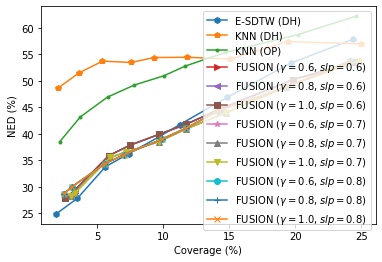

In [35]:
plt.figure(figsize=(6,4))
markers = ['x','+','o','v','^','*','s','<','>','.','p','h']
for i,(key,vals) in enumerate(plots.items()):
#    if i in [2,3,5,6,7,8,9,10,11,13]: continue
    plt.plot(vals[:,0], vals[:,1], marker=markers.pop(),label=key)

plt.xlabel('Coverage (%)')
plt.ylabel('NED (%)')
plt.legend()
#plt.savefig("/home/korhan/Dropbox/report/figures/curves_zr_knn_fuse_slope_avg.pdf", bbox_inches='tight')

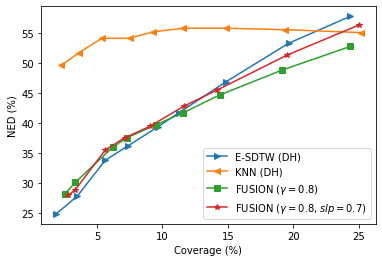

In [136]:
plt.figure(figsize=(6,4))
markers = ['x','+','o','v','^','*','s','<','>']
for i,(key,vals) in enumerate(plots.items()):
    if i in [2,3,5,6,7,8,9,10,11,13]: continue
    plt.plot(vals[:,0], vals[:,1], marker=markers.pop(),label=key)

plt.xlabel('Coverage (%)')
plt.ylabel('NED (%)')
plt.legend()
#plt.savefig("/home/korhan/Dropbox/report/figures/curves_zr_knn_fuse_slope_avg.pdf", bbox_inches='tight')

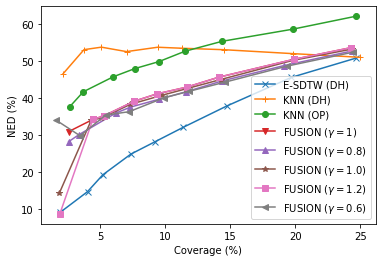

In [69]:
plt.figure()
markers = ['x','+','o','v','^','*','s','<','>']
for i,(key,vals) in enumerate(plots.items()):
    plt.plot(vals[:,0], vals[:,1], marker=markers[i],label=key)

plt.xlabel('Coverage (%)')
plt.ylabel('NED (%)')
plt.legend()

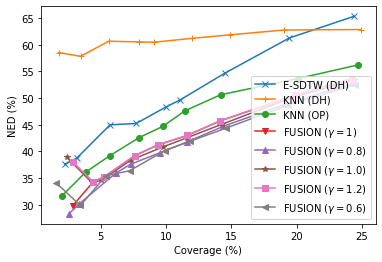

In [72]:
plt.figure()
markers = ['x','+','o','v','^','*','s','<','>']
for i,(key,vals) in enumerate(plots.items()):
    plt.plot(vals[:,0], vals[:,1], marker=markers[i],label=key)

plt.xlabel('Coverage (%)')
plt.ylabel('NED (%)')
plt.legend()

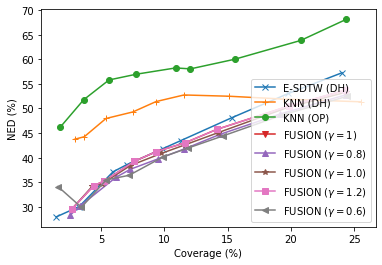

In [75]:
plt.figure()
markers = ['x','+','o','v','^','*','s','<','>']
for i,(key,vals) in enumerate(plots.items()):
    plt.plot(vals[:,0], vals[:,1], marker=markers[i],label=key)

plt.xlabel('Coverage (%)')
plt.ylabel('NED (%)')
plt.legend()

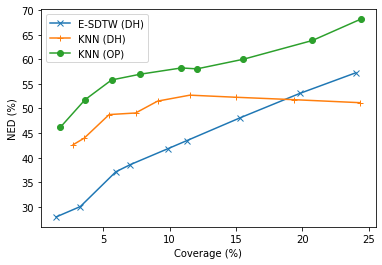

In [14]:
plt.figure()
markers = ['x','+','o','v','^','*','s']
for i,(key,vals) in enumerate(plots.items()):
    plt.plot(vals[:,0], vals[:,1], marker=markers[i],label=key)

plt.xlabel('Coverage (%)')
plt.ylabel('NED (%)')
plt.legend()

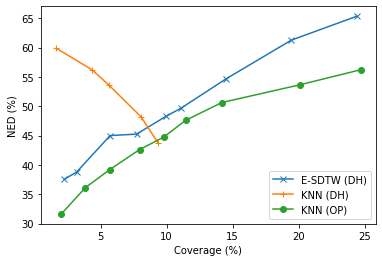

In [88]:
plt.figure()
markers = ['x','+','o','v','^','*','s']
for i,(key,vals) in enumerate(plots.items()):
    plt.plot(vals[:,0], vals[:,1], marker=markers[i],label=key)

plt.xlabel('Coverage (%)')
plt.ylabel('NED (%)')
plt.legend()

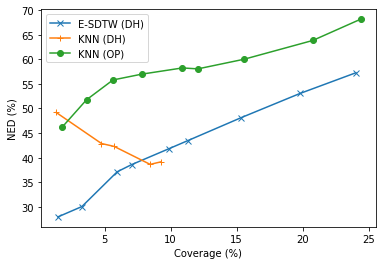

In [85]:
plt.figure()
markers = ['x','+','o','v','^','*','s']
for i,(key,vals) in enumerate(plots.items()):
    plt.plot(vals[:,0], vals[:,1], marker=markers[i],label=key)

plt.xlabel('Coverage (%)')
plt.ylabel('NED (%)')
plt.legend()

In [ ]:
all_results = []
for i in np.arange(0,36,1):

    results = {}

    try:
        params['expname'] = df.exp_path[i].split('/')[-2]
        print(i, params['expname'])    
    
        results['devset'] = df.devset[i]
        results['set'] = df.set[i]

        params['clustering']['cost_thr'] = 0.1

        matches_df, nodes_df, clusters_list, scores, pars = run_until_coverage_th({}, params)

        results = {**results, **scores}

        all_results.append(results)

    except:
        continue


0 zr_cat_A_c3_right_PCA40_B300_D15_P4_R15_T0.3663_Tscore0.5_castthr7.0599_dx29_dy5_medthr0.45_rhothr0.0_trimthr1.0_n_concat20
0.1
*** Matches already discovered !!! ***
*** found 14016 matches ***


/home/korhan/Dropbox/tez_scripts/utils/pipeline.py:542: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "get_vals" failed type inference due to: Invalid use of Function(<function round_ at 0x7f54b4201840>) with argument(s) of type(s): (array(float64, 2d, C), Literal[int](3))
 * parameterized
In definition 0:
    All templates rejected with literals.
In definition 1:
    All templates rejected without literals.
This error is usually caused by passing an argument of a type that is unsupported by the named function.
[1] During: resolving callee type: Function(<function round_ at 0x7f54b4201840>)
[2] During: typing of call at /home/korhan/Dropbox/tez_scripts/utils/pipeline.py (545)


File "utils/pipeline.py", line 545:
def get_vals(i,j, f1f2arr, s1e1s2e2array, wgtharray):
    <source elided>
    idxmatch = np.where((f1f2arr[:,0]==i) & (f1f2arr[:,1]==j))
    return s1e1s2e2array[idxmatch], np.round(wgtharray[idxmatch],3)
    ^

  @jit
/hom

Read 1498 nodes/tokens
Read 134 clusters
*** post disc completed, found 1498 segments from 134 clusters ***
*** Coverage: 7.9500, NED: 70.44
trial 0 th:0.10000 cov:7.95000 err:-2.05000
0.11949685534591194
*** Matches already discovered !!! ***
*** found 14016 matches ***
Read 1756 nodes/tokens
Read 163 clusters
*** post disc completed, found 1756 segments from 163 clusters ***
*** Coverage: 9.2100, NED: 84.55
trial 1 th:0.11950 cov:9.21000 err:-0.79000
1 zr_cat_Signer04_c3_right_PCA40_B300_D15_P4_R15_T0.3663_Tscore0.5_castthr7.0599_dx29_dy5_medthr0.45_rhothr0.0_trimthr1.0_n_concat20
0.1
*** Matches already discovered !!! ***
*** found 7961 matches ***
Read 870 nodes/tokens
Read 91 clusters
*** post disc completed, found 870 segments from 91 clusters ***
*** Coverage: 9.7300, NED: 58.14
trial 0 th:0.10000 cov:9.73000 err:-0.27000
2 zr_cat_Signer08_c3_right_PCA40_B300_D15_P4_R15_T0.3663_Tscore0.5_castthr7.0599_dx29_dy5_medthr0.45_rhothr0.0_trimthr1.0_n_concat20
0.1
*** Matches already di

In [17]:
pd.DataFrame(all_results)

,devset,set,ned,coverage,coverageNS,coverageNS_f,grouping_F,grouping_P,grouping_R,token_F,...,type_F,type_P,type_R,boundary_F,boundary_P,boundary_R,n_clus,n_node,exp_path,length_avg
0,A,A,42.82,9.82,9.83,13.84,23.34,16.44,40.47,0.05,...,0.72,0.76,0.68,13.18,100.0,7.06,1089,2180,/home/korhan/Desktop/tez/zr_exps/zr_cat_A_c3_r...,58.338665
1,A,Signer04,37.02,10.20,10.06,13.02,24.45,18.11,37.82,0.02,...,0.23,0.32,0.18,14.39,100.0,7.76,563,1127,/home/korhan/Desktop/tez/zr_exps/zr_cat_Signer...,60.866843
2,A,Signer09,51.87,9.45,9.24,13.55,5.23,3.17,15.38,0.11,...,0.57,1.79,0.34,10.94,100.0,5.79,40,83,/home/korhan/Desktop/tez/zr_exps/zr_cat_Signer...,48.790698
3,A,B,45.61,10.88,10.61,14.10,22.08,13.76,56.28,0.08,...,1.08,1.08,1.08,12.54,100.0,6.70,1040,2116,/home/korhan/Desktop/tez/zr_exps/zr_cat_B_c3_r...,54.727989
4,A,Signer05,51.80,10.59,10.47,13.04,25.64,16.02,64.63,0.12,...,1.22,1.43,1.07,11.96,100.0,6.36,575,1153,/home/korhan/Desktop/tez/zr_exps/zr_cat_Signer...,55.562823
5,A,C,28.76,9.97,9.90,12.85,29.58,19.56,60.93,0.10,...,0.96,1.06,0.88,11.29,100.0,5.99,970,1997,/home/korhan/Desktop/tez/zr_exps/zr_cat_C_c3_r...,53.096602
6,A,Signer01,41.99,10.06,9.95,12.91,25.94,16.77,57.59,0.06,...,0.33,0.39,0.28,11.48,100.0,6.10,664,1340,/home/korhan/Desktop/tez/zr_exps/zr_cat_Signer...,51.536765
7,A,Signer03,22.30,10.03,10.12,13.78,45.84,30.92,88.89,0.03,...,0.36,0.68,0.25,11.32,100.0,6.00,352,757,/home/korhan/Desktop/tez/zr_exps/zr_cat_Signer...,53.316953
8,B,A,42.82,9.82,9.83,13.84,23.34,16.44,40.47,0.05,...,0.72,0.76,0.68,13.18,100.0,7.06,1089,2180,/home/korhan/Desktop/tez/zr_exps/zr_cat_A_c3_r...,58.338665
9,B,Signer04,37.02,10.20,10.06,13.02,24.45,18.11,37.82,0.02,...,0.23,0.32,0.18,14.39,100.0,7.76,563,1127,/home/korhan/Desktop/tez/zr_exps/zr_cat_Signer...,60.866843


In [18]:
dfname

'zr_cat_c3_right_PCA40_T_dx_castthr'

In [19]:
params['clustering']

{'method': 'custom',
 'cost_thr': 0.13776174139358804,
 'mix_ratio': 0.1,
 'modularity_thr': 0,
 'clus_alg': 'fastgreedy',
 'min_cluster_size': 2,
 'dedupthr': 0.5}

In [20]:
pd.DataFrame(all_results).to_csv('../results/clustering_zr_c3_custom.csv')